In [ ]:
1)Import Data, Do Exploratry Analysis by shape, info, describe, distribution plot of Ivs,joint plot for each Ivs against it's target variable, pairplot to see the coorelation between ivs and between ivs and dependent/target variablw, there must be high positive or negative corelation between independent and dependent variable.
pairplot to be done against all in the dataset and as well as for each ivs against only sales (sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, aspect=1, kind='reg');
,sns.pairplot(data, size=2, aspect=1.5);). then check the correlation statistically as alredy done visually by using corr fonction (). then confirm or see correltion visually by heatmap again. Then do Data preparation that is group your data to X independent variable, Y data a dependent variable. use X = data.iloc[:,:-1]
X.head(); y = data.iloc[:,-1]. 
2)Now, Splitting X and y into training and testing data. using from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
Now the X-train, Y-train, X-test, Y-test data is prepared and scaling/standardization/normalization is done
Scaling is done to only X train and X test data, not done to Y train and Y test data
3)Next do themodelling using linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
4)Once the regressor = LinearRegression()
regressor.fit(X_train, y_train) created here—regression (study) done on x train and y train values. This creates your m and c or relationship between x train and y train values.

Then generate c value using ‘regressor.intercept_’ and m value by ‘regressor.coef_’. because m and c is what the coefficients and determines the relation. Tis is what regressor does
Now the X test is ready after study with m and c values now check m values which is highest and that is the highest predictor of y say TV the highest predictor of sales.
Next  the aim of finding the t prediction test( Y) to be done by using ‘y_pred_test = regressor.predict(X_test)’
If required can check y_pred_train ‘y_pred_train = regressor.predict(X_train)’
feeding=Y_pred_test----feed---X_test  values,  (this not required) can do  Y_Pred_Train-----feed----X_Train  values

[for reference verify whether the model calculation or predicted values are right as per the formula below(manual confirmation) y_pred test values checked with using m, c values and y test values.
# y = m1*x1 + m2*x2 + m3*x3 + c
# y = 3.77588591*x1 + 2.88656448*x2 + (-0.05946128)*x3 + 14.217500000000001
op = 3.77588591*(-1.482063) + 2.88656448*(-0.843297) + (-0.05946128)*(-0.019910) + 14.217500000000001]

feed x train y train get model then predict y_pred_test passing X_test values. Once getting y_pred_test compare it’s error with Y_test error this is called accuracy and it should be above 0.85 for test values




 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [8]:
data.shape


(200, 4)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [10]:
data.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


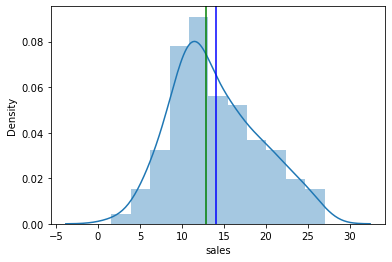

In [11]:
sns.distplot(data.sales)
plt.axvline(data.sales.mean(), color='b')
# plt.axvline(data.sales.quantile(0.), color='g')
# plt.axvline(data.sales.quantile(.25), color='g')
plt.axvline(data.sales.quantile(.5), color='g')
# plt.axvline(data.sales.quantile(.75), color='g')
# plt.axvline(data.sales.quantile(1.), color='g')
plt.show()

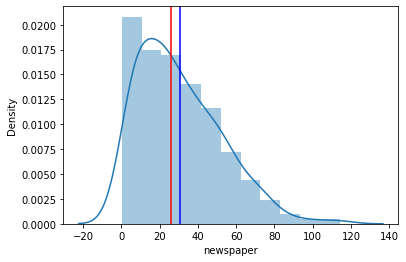

In [12]:
sns.distplot(data.newspaper)
plt.axvline(data.newspaper.mean(), color='b')
plt.axvline(data.newspaper.median(), color='r')
plt.show()

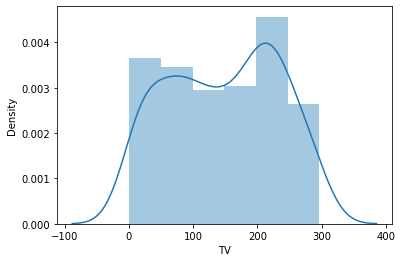

In [13]:
sns.distplot(data.TV);


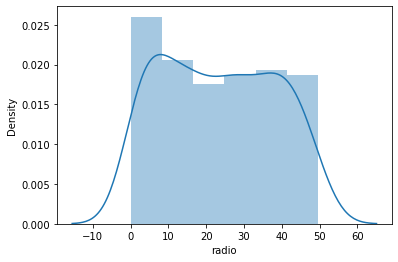

In [14]:
sns.distplot(data.radio);


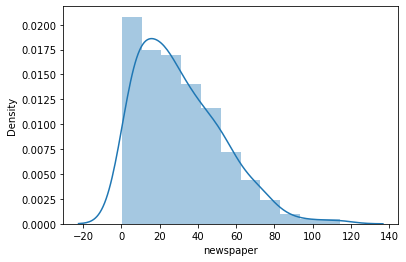

In [15]:
sns.distplot(data.newspaper);


Sales seems to be normally distributed.

Spend of Newspaper is right skewed. Most of the people spend less on newspaper.

TV and Radio are normally distributed.

In [ ]:
data.head()


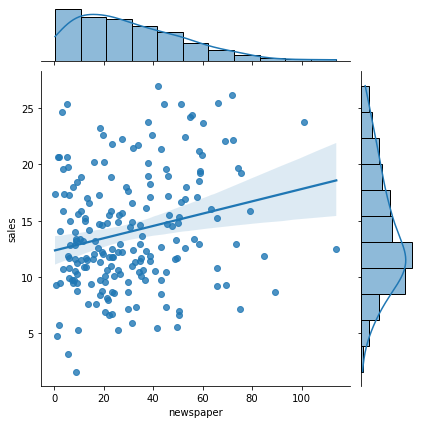

In [16]:
sns.jointplot("newspaper","sales",data=data, kind='reg');


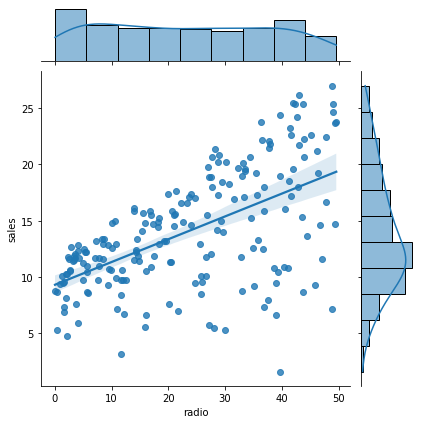

In [17]:
sns.jointplot("radio","sales",data=data, kind='reg');


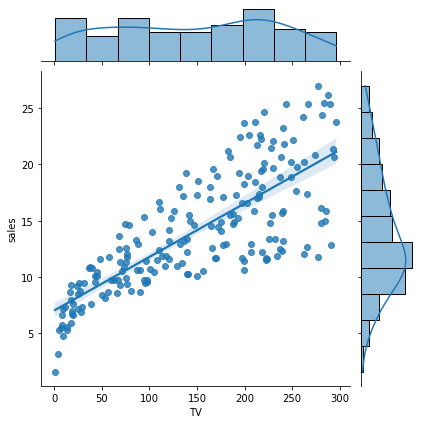

In [18]:
sns.jointplot("TV","sales",data=data, kind='reg');


TV is most important for predicting Sales.

Radio is less important for predicting Sales.

Newspaper is least important/not important for predicting Sales.

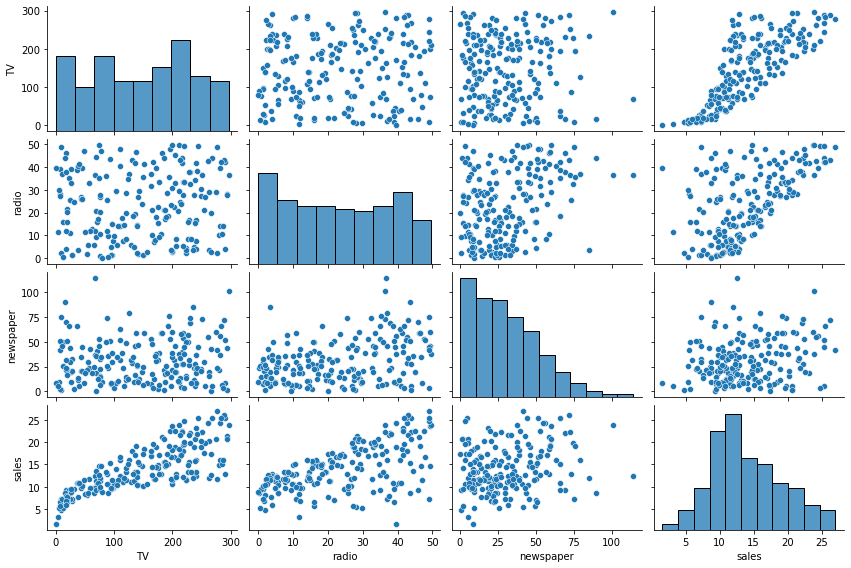

In [40]:
sns.pairplot(data, size=2, aspect=1.5);


We always want a high correlation between Independent Variable and Dependent Variable. The more high it is, the better is the feature for predicting the Target Variable.

However, there must be least correlation between any two Independent variables. If any independent variables have high positive or high negative correlation, then it leads to a major issue in ML which is called MULTICOLLINEARITY.

If we find two Independent variables with high positive or high negative correlation, then we remove any one of the Independent variable...This is a doubt. why removing it will create the same model right or how would you know which is affecting more or errorprone

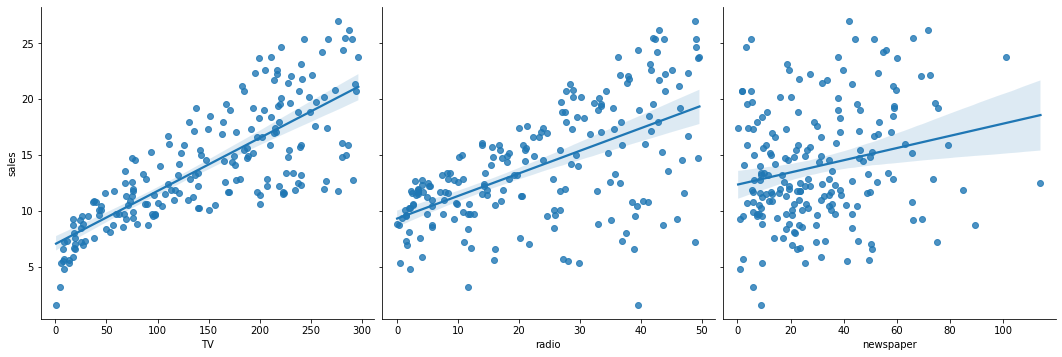

In [20]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, aspect=1, kind='reg');


In [21]:
cor = data.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


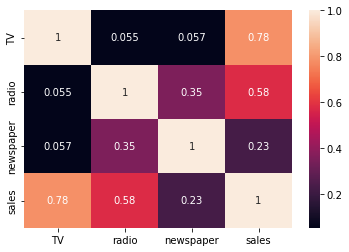

In [22]:
sns.heatmap(cor, annot=True);


# Data Preparation


In [23]:
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [24]:
X = data.iloc[:,:-1]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [25]:
y = data.iloc[:,-1]
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [26]:
X.shape


(200, 3)

In [27]:
y.shape


(200,)

# Splitting X and y into training and testing data


In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# It is good to have train size atleast twice that of test size

In [30]:
X_train.shape


(160, 3)

In [31]:
X_test.shape


(40, 3)

In [32]:
y_train.shape


(160,)

In [33]:
y_test.shape


(40,)

In [56]:
X_train.head()


,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [57]:
X_test.head()


,TV,radio,newspaper
19,69.2,20.5,18.3
171,50.0,11.6,18.4
108,90.4,0.3,23.2
99,289.7,42.3,51.2
178,170.2,7.8,35.2


In [58]:
X_train.tail()


,TV,radio,newspaper
68,-0.132459,-0.605041,-0.932076
193,-1.574162,-1.313000,0.068968
118,-0.875155,-1.537641,-0.716898
48,1.055382,1.232929,-0.543820
173,-1.545824,-0.223832,-0.613987


In [59]:
y_train


135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: sales, Length: 160, dtype: float64

In [38]:
X_train.describe()


,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


In [41]:
X_train.columns


Index(['TV', 'radio', 'newspaper'], dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TV', 'radio', 'newspaper']] = scaler.fit_transform(X_train[['TV', 'radio', 'newspaper']])
X_train.head()


,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [60]:
X_train.describe()


,TV,radio,newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,2.498002e-17,-1.670539e-16,-1.047773e-16
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.728842e+00,-1.592099e+00,-1.367108e+00
25%,-8.754498e-01,-9.437042e-01,-8.630784e-01
50%,8.125819e-02,6.207404e-02,-1.976652e-01
75%,8.245444e-01,8.823534e-01,7.004673e-01
max,1.722510e+00,1.784320e+00,3.310665e+00


In [61]:
X_test.columns


Index(['TV', 'radio', 'newspaper'], dtype='object')

In [62]:
X_test[['TV', 'radio', 'newspaper']] = scaler.transform(X_test[['TV', 'radio', 'newspaper']])
X_test.head()


,TV,radio,newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


# Modeling using Linear Regression


In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
regressor

LinearRegression()

In [67]:
# y = mx + c
# Intercept c
regressor.intercept_


14.217500000000001

In [68]:
# y = mx + c
# Slope
regressor.coef_


array([ 3.77588591,  2.88656448, -0.05946128])

In [69]:
X_train.columns


Index(['TV', 'radio', 'newspaper'], dtype='object')

If we look, the coefficient values of the IVs are as follows:
TV i.e. m1 =3.77588591
Radio i.e. m2 = 2.88656448
Newspaper i.e. m3 = -0.05946128
If we observe carefully, TV has the highest coefficient value and Newspaper has the lowest. This means that as per Linear Regression, TV is the most important predictor and Newspaper is the least important predictor.
.TV > Radio > Newspaper

In [70]:
# y = m1*x1 + m2*x2 + m3*x3 + c
# y = 3.77588591*x1 + 2.88656448*x2 + (-0.05946128)*x3 + 14.217500000000001

In [71]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [72]:
#y_pred_test value and y test value compared this is called Accuracy. like 11.3 is compared with 10.5 these are not equal and there is a error
this manual comparison not possible, M/C will do it.
print(y_test)


19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
183     8.7
6       7.2
147    13.2
13      9.2
153    16.6
62     24.2
126    10.6
181    10.5
155    15.6
81     11.8
8      13.2
34     17.4
131     1.6
38     14.7
75     17.0
184    26.2
146    10.3
46     14.9
160    12.9
61      8.1
124    15.2
180    12.6
186    22.6
123    11.6
45      8.5
17     12.5
56     23.7
151    16.1
112    21.8
23      5.6
190     6.7
130     9.7
5      12.9
84     13.6
107     7.2
Name: sales, dtype: float64


In [73]:
#Above test is important but this test on seen data can be done or left. can do it to compare

y_pred_train = regressor.predict(X_train)
y_pred_train

array([12.04236485,  9.22699748, 15.08826616, 16.35778089, 17.07540865,
       13.36661981,  3.78817791, 12.08662048, 15.62955297,  8.68273227,
       10.61195362, 19.36739522, 18.41226024, 15.30372386, 10.00012405,
        8.19743932, 21.49425935, 14.15684188, 16.3171467 ,  8.72677043,
       15.26881361, 12.47602439, 13.7213733 , 14.20527235, 18.32820674,
       19.11937848, 20.32200442, 17.49488834,  9.34748691, 11.75581878,
       19.85996966,  9.91949478, 20.71025022, 23.06178922, 10.08383292,
       17.13980942, 19.65212394, 18.43129662, 16.91732121, 18.37653406,
       17.10374151,  8.84010201,  9.94425907,  5.38665742,  3.58633703,
       16.63361911, 12.58819659, 18.15954096, 11.77376066, 12.69588564,
       13.79647123,  7.01426813, 16.64772647,  9.79703851,  8.13501333,
       15.71731388, 24.83264798, 10.84564094, 21.15206558, 13.84768418,
       10.64154445,  8.46646573, 12.4156824 , 20.48878664, 10.50385731,
       14.51608774, 16.33763035, 17.16954682, 13.18269257, 17.34

In [79]:
# here 10.8 and 12.04 is the difference between y-train and ypred-train
y_train


135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: sales, Length: 160, dtype: float64

In [76]:
y_pred_test


array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [77]:
This is to verify whether the model calculation or predicted values are right as per the formula below(manual confirmation)
# y = m1*x1 + m2*x2 + m3*x3 + c
# y = 3.77588591*x1 + 2.88656448*x2 + (-0.05946128)*x3 + 14.217500000000001
op = 3.77588591*(-1.482063) + 2.88656448*(-0.843297) + (-0.05946128)*(-0.019910) + 14.217500000000001
op


6.188351908361911

In [78]:
op = 3.77588591*(-0.969615) + 2.88656448*(1.437148) + (-0.05946128)*(0.256079) + 14.217500000000001
op


14.689537967557271

# Compute how good is out model. Here considering only R2
This is finding difference between actual and predicted error


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [81]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(MAE_train," ",MAE_test)


1.2131871622729429   1.3617813502090275


In [82]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(MSE_train," ",MSE_test)

2.406814755818906   4.402118291449682


In [83]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train," ",RMSE_test)


1.5513912323520802   2.0981225634956795


In [84]:
# The beauty of R2 score s it is quantifiable like near to 1 the score it is good, but above results are not quantyfiable
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

#The model to be accepted by industry test accuracy or R2 score should have 0.85 and above

0.9067114990146383   0.8601145185017869


In [85]:
X_train.shape


(160, 3)

In [86]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)


160 3


In [87]:
num = (1-R2_train)*(n-1)
den = n-p-1
AR2_train = 1-(num/den)
AR2_train


0.9049174893803045

In [88]:
X_test.shape


(40, 3)

In [89]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)


40 3


In [90]:
num = (1-R2_test)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test


0.8484573950436025